# Data Cleaning

A typical **data clean** process for **machine learning tasks** contain the following steps in this order:

1. Import Data
2. Merge Datasets
3. Rebuild Missing Data
4. Standardize
5. Normaize
6. De-Duplicate
7. Verify and Enrich
8. Export Data

The following steps describe an **exemplary** data cleaning process.

## 1. Import Data

We load two versions of the **Titanic** dataset as `df1` and `df2` respectively and the [New York City Airbnb Open Data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) dataset as `airbnb`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

The **Seaborn Titanic** Dataset:

In [2]:
df1 = sns.load_dataset('titanic')
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Call `info()` to get information about the data frame like the shape (rows, columns), the data type of our features, and the memory usage:

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


The **Titanic** Dataset from **Open ML**:

In [4]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml('titanic', version=1, as_frame=True)
df2, df2['survived'] = titanic.data, titanic.target
df2.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


The **New York City Airbnb Open Data** Dataset:

In [5]:
airbnb = pd.read_csv('./data/ab_nyc_2019.csv.zip', compression='zip')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Separate features into **numerical** and **categorical** features:

In [7]:
def printColumnTypes(non_numeric_df, numeric_df):
    print('Non-Numeric Columns:')
    for col in non_numeric_df:
        print(f'- {col}')
    print('\nNumeric Columns:')
    for col in numeric_df:
        print(f'- {col}')
        
cat_df = df1.select_dtypes(include=['object'])
num_df = df1.select_dtypes(exclude=['object'])
printColumnTypes(cat_df, num_df)

Non-Numeric Columns:
- sex
- embarked
- who
- embark_town
- alive

Numeric Columns:
- survived
- pclass
- age
- sibsp
- parch
- fare
- class
- adult_male
- deck
- alone


## 2. Merge Datasets

The Titanic dataset `df1` provided by **Seaborn** is complete in terms of a data analysis. In order to prepare a training dataset, the columns `survived` and `alive` must be removed as they are a target, not a feature.

The Titanic dataset `df2` provided by **SciKit-Learn** is already divided into a feature set and a target set. For the task of data analysis, we merged the target into the dataset.

## 3. Rebuild Missing Data

The two common methods to deal with missing values are

1. dropping the rows or columns. **Problem**: you are losing information that might be useful for prediction.
2. adding them based on other observations i.e. the mean or median. **Problem**: adding values will introduce bias to the data

**Thumb of rule**: You should try to add missing data instead of removing data


### Identify Missing Values

Get number of missing values per column:

In [13]:
df1.isna().sum()

# the opposite is: `df1.count(0)`

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Print **heatmap** of missing values:

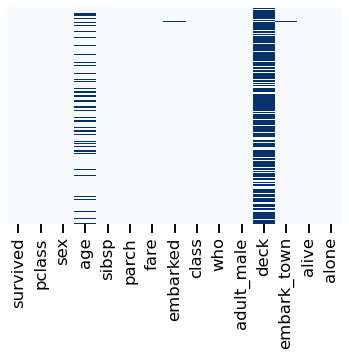

In [14]:
sns.set_context('talk', font_scale=1)
sns.heatmap(df1.isnull(), yticklabels=False, cmap='Blues', cbar=False);

Count number of non-NA values per row

In [15]:
df1.count(1).value_counts()

14    549
15    182
13    160
dtype: int64

### Dropping Feature Columns

Dropping feature usually isn’t recommended because you’re losing information. 

But if you’re sure that the column isn’t important, or simply has too many missing values, you can choose to drop them. 

In [16]:
colsToDrop = ['deck']
df1.drop(colsToDrop, axis=1, inplace=True, errors='ignore')     # drop columns: axis=1, drop rows: axis=0

df1.isna().sum()[df1.isna().sum() > 0]

age            177
embarked         2
embark_town      2
dtype: int64

### Dropping Data Rows

Remove rows with `dropna()`.

Here we drop the rows which have missing data in 'embarked' and 'embark_town':

In [17]:
df1[df1['embarked'].isna() & df1['embark_town'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [18]:
df1.dropna(subset=['embarked'], inplace=True)

In [19]:
df1.isna().sum()[df1.isna().sum() > 0]

age    177
dtype: int64

### Add Missing Data (Imputing)

There are three techniques for imputing:

1. fill in null values based on given value (mean, median, mode or a specified value) with `fillna()`
2. backward fill and forward fill (filling in missing values based on the value after or before the column) with `bfill` and `ffill`
3. Sklearn built-in function `Simple_Imputer` that imputes missing values (typically used in a SciKit-Learn Pipeline)

Inspecting the current `age` values using a boxplot,

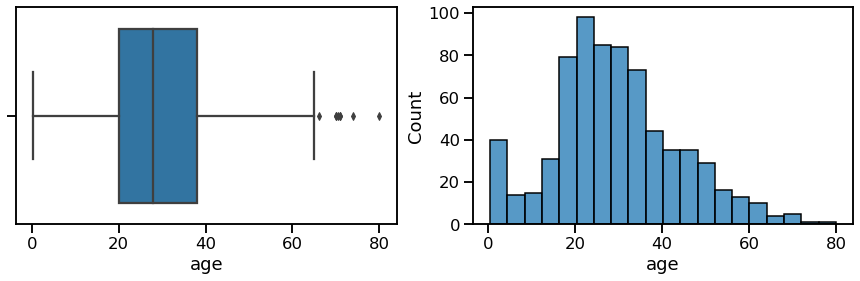

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(ax=ax1, data=df1, x='age')
sns.histplot(ax=ax2, data=df1, x='age');

we could decide to fill missing `age` values with the **median** of `age`:

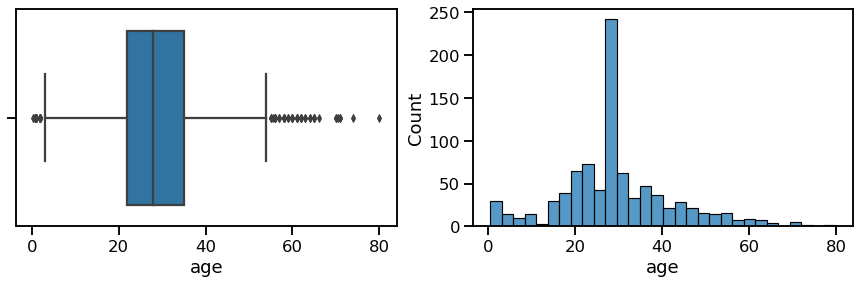

In [21]:
# make a copy for evaluation of the result
df11 = df1.copy()

age_median = round(df11['age'].median(), 2)
df11['age'].fillna(age_median, inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(ax=ax1, data=df11, x='age')
sns.histplot(ax=ax2, data=df11, x='age');

We could also decide to fill missing `age` values with the backward- or forward-fill:

In [22]:
# make a copy for evaluation of the result
df12 = df1.copy()
df12['age'].bfill(inplace=True)

We could also decide to fill missing `age` values with `SimpleImputor` from the **sklearn library**:

In [23]:
# df13 = df1.copy()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

df1[['age']] = imputer.fit_transform(df1[['age']])

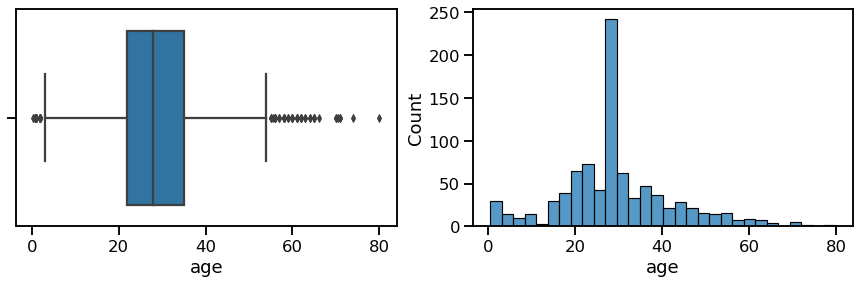

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(ax=ax1, data=df1, x='age')
sns.histplot(ax=ax2, data=df1, x='age');

So, finally all NA data is fixed:

In [25]:
df1.isna().any().sum()

0

### Replace NA Values

Replacing values can be done with `fillna({column_name: replacement_for_NA})`.

Supposed we'd like to replace all NA values of `name` of the `airbnb` dataframe with `None`, we'd do:

In [42]:
airbnb.fillna({'name':'None'}, inplace=True)
airbnb['name'].isna().sum()

0

## Inconsistent Data / Irrelevant Features

Inconsistent data refers to things like **spelling errors** in your data, column names that are **not relevant** to the data, the **wrong data type**, etc.

### Remove Rows based on Regular Expressions

Supposed you want to remove rows that contain a certain word, then use `str.contains()` to find the indexes that contain those rows.
Then, using the `drop` function, and setting axis to index, I can supply the indexes I have and drop those rows:

In [47]:
# example: remove rows that contain '[Nn]oisy'
noisy = airbnb[airbnb['name'].str.contains('[Nn]oisy', regex=True)]
print(noisy['name'])

airbnb.drop(noisy.index, axis='index', inplace=True)

Series([], Name: name, dtype: object)


# TODO 

* [How to handle categorical data in scikit with pandas](https://www.kaggle.com/getting-started/27270)